In [1]:
!pip install wfdb pandas matplotlib scikit-learn

In [2]:
import pandas as pd
df = pd.read_csv('Dataset/ptbxl/ptbxl_database.csv')
df.head(5)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837 entries, 0 to 21836
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21837 non-null  int64  
 1   patient_id                    21837 non-null  float64
 2   age                           21748 non-null  float64
 3   sex                           21837 non-null  int64  
 4   height                        6983 non-null   float64
 5   weight                        9429 non-null   float64
 6   nurse                         20328 non-null  float64
 7   site                          21819 non-null  float64
 8   device                        21837 non-null  object 
 9   recording_date                21837 non-null  object 
 10  report                        21837 non-null  object 
 11  scp_codes                     21837 non-null  object 
 12  heart_axis                    13332 non-null  object 
 13  i

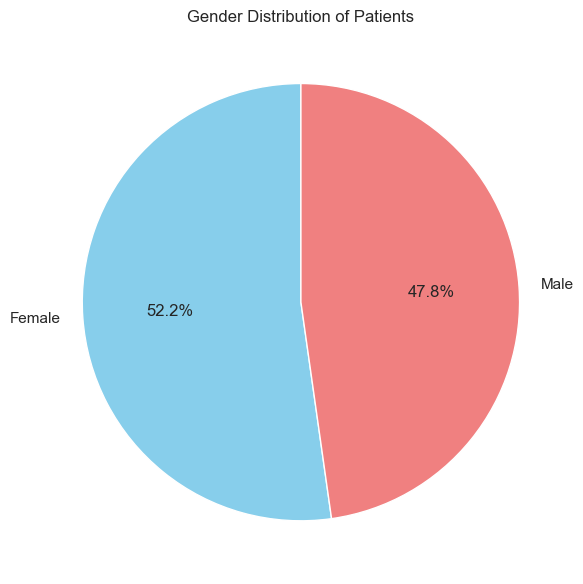

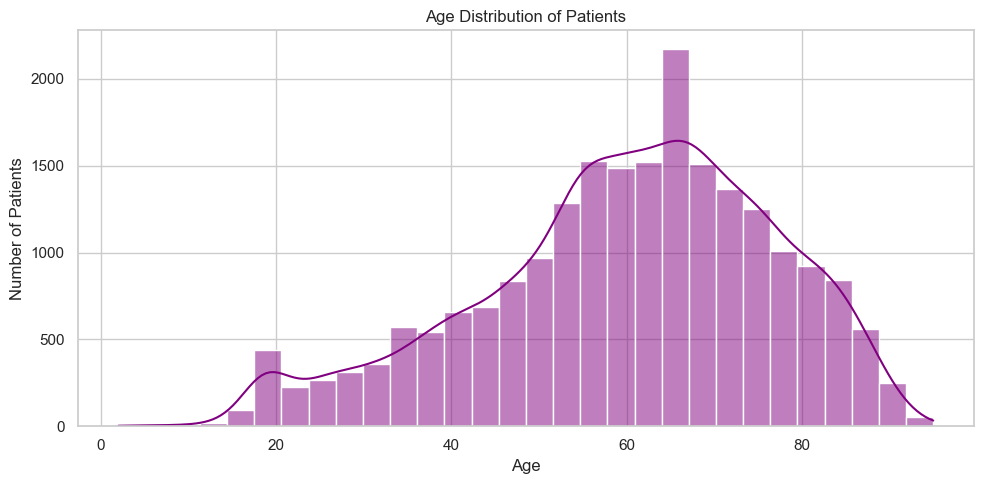

C:\Users\estya\AppData\Local\Temp\ipykernel_2860\928866821.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df_cleaned, palette='pastel')


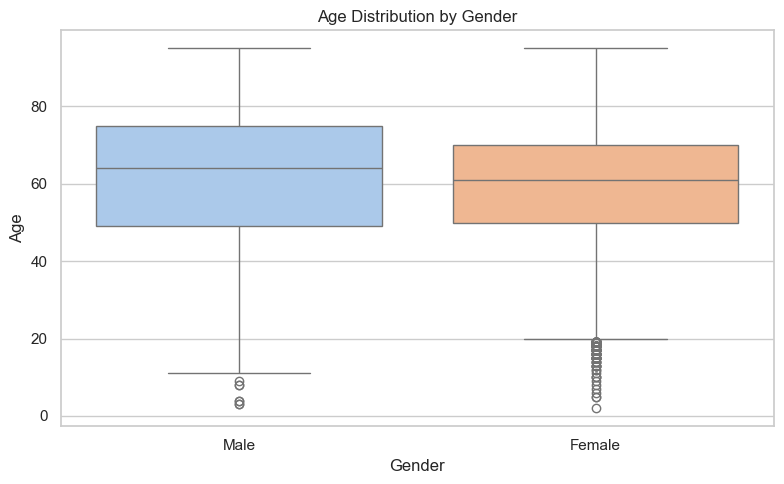

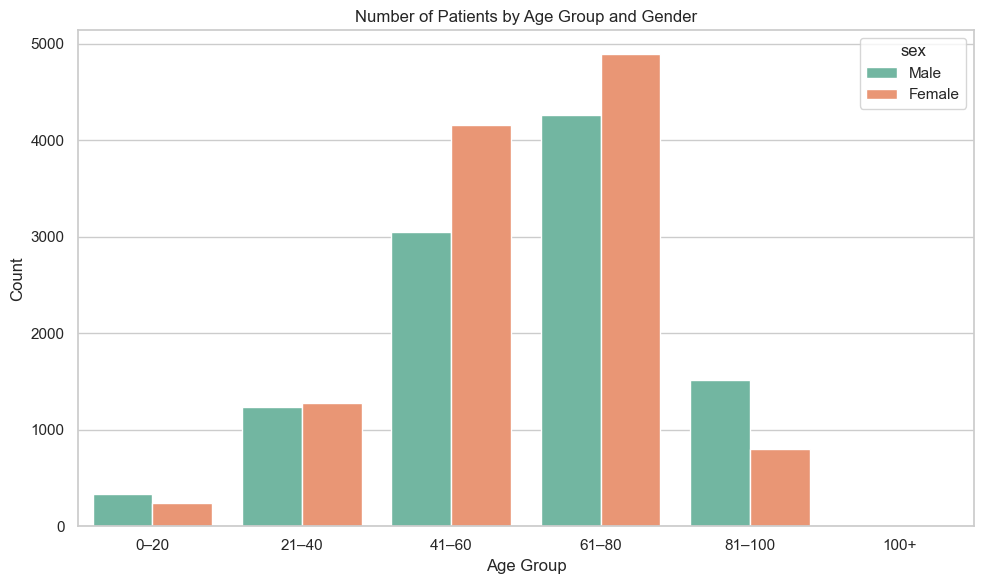

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare data
df_cleaned = df[['age', 'sex']].dropna()
df_cleaned['sex'] = df_cleaned['sex'].map({0: 'Female', 1: 'Male'})

# Set style
sns.set(style="whitegrid")

# 1. Pie Chart: Gender Distribution
gender_counts = df_cleaned['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Patients')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Histogram: Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# 3. Box Plot: Age Distribution by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='age', data=df_cleaned, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show(block=True)
plt.show()

# 4. Count Plot: Age Groups by Gender
# Create age groups
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 20, 40, 60, 80, 100, 120], 
                                 labels=['0–20', '21–40', '41–60', '61–80', '81–100', '100+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='sex', data=df_cleaned, palette='Set2')
plt.title('Number of Patients by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [16]:
selected_columns = ['patient_id', 'age', 'sex', 'weight', 'filename_lr', 'filename_hr']
df_reduced = df[selected_columns]

# Display the first few rows of the reduced dataset
df_reduced.head()

,patient_id,age,sex,weight,filename_lr,filename_hr
0,15709.0,56.0,1,63.0,records100/00000/00001_lr,records500/00000/00001_hr
1,13243.0,19.0,0,70.0,records100/00000/00002_lr,records500/00000/00002_hr
2,20372.0,37.0,1,69.0,records100/00000/00003_lr,records500/00000/00003_hr
3,17014.0,24.0,0,82.0,records100/00000/00004_lr,records500/00000/00004_hr
4,17448.0,19.0,1,70.0,records100/00000/00005_lr,records500/00000/00005_hr


In [17]:
df_reduced.head(100)

,patient_id,age,sex,weight,filename_lr,filename_hr
0,15709.0,56.0,1,63.0,records100/00000/00001_lr,records500/00000/00001_hr
1,13243.0,19.0,0,70.0,records100/00000/00002_lr,records500/00000/00002_hr
2,20372.0,37.0,1,69.0,records100/00000/00003_lr,records500/00000/00003_hr
3,17014.0,24.0,0,82.0,records100/00000/00004_lr,records500/00000/00004_hr
4,17448.0,19.0,1,70.0,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...
95,21698.0,31.0,0,62.0,records100/00000/00096_lr,records500/00000/00096_hr
96,12761.0,51.0,0,80.0,records100/00000/00097_lr,records500/00000/00097_hr
97,10804.0,20.0,0,85.0,records100/00000/00098_lr,records500/00000/00098_hr
98,18012.0,25.0,0,60.0,records100/00000/00099_lr,records500/00000/00099_hr


In [18]:
df_reduced.info

<bound method DataFrame.info of        patient_id   age  sex  weight                filename_lr  \
0         15709.0  56.0    1    63.0  records100/00000/00001_lr   
1         13243.0  19.0    0    70.0  records100/00000/00002_lr   
2         20372.0  37.0    1    69.0  records100/00000/00003_lr   
3         17014.0  24.0    0    82.0  records100/00000/00004_lr   
4         17448.0  19.0    1    70.0  records100/00000/00005_lr   
...           ...   ...  ...     ...                        ...   
21832     17180.0  67.0    1     NaN  records100/21000/21833_lr   
21833     20703.0  93.0    0     NaN  records100/21000/21834_lr   
21834     19311.0  59.0    1     NaN  records100/21000/21835_lr   
21835      8873.0  64.0    1     NaN  records100/21000/21836_lr   
21836     11744.0  68.0    0     NaN  records100/21000/21837_lr   

                     filename_hr  
0      records500/00000/00001_hr  
1      records500/00000/00002_hr  
2      records500/00000/00003_hr  
3      records500/00000

In [19]:
df_reduced.describe()

,patient_id,age,sex,weight
count,21837.000000,21748.000000,21837.000000,9429.000000
mean,11255.005953,59.836307,0.478912,70.997561
std,6234.132489,16.953125,0.499567,15.875146
min,302.000000,2.000000,0.000000,5.000000
25%,5982.000000,50.000000,0.000000,60.000000
50%,11423.000000,62.000000,0.000000,70.000000
75%,16614.000000,72.000000,1.000000,80.000000
max,21797.000000,95.000000,1.000000,250.000000


In [20]:
df.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [ ]:
df['heart_axis'].isna().sum()  # Check for missing values in 'heart_axis'

8505

In [24]:
print(df['heart_axis'].unique())  # Display unique values in 'heart_axis'

[nan 'LAD' 'ALAD' 'RAD' 'AXR' 'MID' 'ARAD' 'AXL' 'SAG']


In [26]:
df['heart_axis'].fillna('UNKNOWN', inplace=True)


In [27]:
df['heart_axis'].isna().sum() 

0

In [28]:
df = pd.get_dummies(df, columns=['heart_axis'])

In [29]:
df.describe()  # Display summary statistics of the DataFrame

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21837.00000,21837.000000,21748.000000,21837.000000,6983.000000,9429.000000,20328.000000,21819.000000,12426.000000,21837.000000
mean,10919.00000,11255.005953,59.836307,0.478912,166.708292,70.997561,2.292503,1.547229,0.747948,5.505335
std,6303.94325,6234.132489,16.953125,0.499567,10.864935,15.875146,3.254786,4.169753,1.183269,2.875306
min,1.00000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5460.00000,5982.000000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10919.00000,11423.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16378.00000,16614.000000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.00000,21797.000000,95.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [30]:
df['height'].isna().sum() 

14854

In [32]:
df['report'].isna().sum()  # Check for missing values in 'report'

0